# Max-Cut QAOA - Qiskit

#### Introduction
This notebook implements the Hybrid quantum-classical Quantum Approximate Optimization Algorithm (QAOA) algorithm using Qiskits Python framework. In this notebook, QAOA is used to solve the Maxcut optimization problem. 

1. For an in depth explanation of QAOA please visit, **[HERE](https://www.youtube.com/watch?v=YpLzSQPrgSc&list=PLOFEBzvs-VvqJwybFxkTiDzhf5E11p8BI&index=14&ab_channel=Qiskit)**
2. For general information about the maxcut problem please visit, **[HERE](https://en.wikipedia.org/wiki/Maximum_cut).**
3. The original source code for the Max-Cut QAOA hyrbid algorithm can be found on Qiskits website **[HERE](https://qiskit.org/textbook/ch-applications/qaoa.html).** The source code was modified slightly in this notebook. 


#### Inspiration for this notebook
True hybrid quantum-classical compilation should create a unified IR. For example, the Intel quantum compiler toolchain’s hybrid compilation workflow is a perfect example of separating the quantum logic from the classical logic, then creating a unified hybrid executable binary file. For more information please visit, **[HERE](https://arxiv.org/abs/2202.11142).**

#### Goal of this notebook
The goal of this notebook is to gain a clearer understanding of which aspects of the quantum circuit change iteration-by-iteration. As you will soon see, the beta and gamma parameters change while the general structure of the quantum circuit stays the same. 
1. In part A, an untranspiled circuit using initial parameters is compared with an untranpiled circuit using updated parameters. 
2. In part B, a transpiled circuit(with IBM superconducting fake backend) using initial parameters is compared with a transpiled circuit(with IBM superconducting fake backend) using updated parameters. 

Part A and part B give us insight on whether a single transpilation might suffice, or whether each iteration requires its own transpilation. For example if the overall structure of the circuit does not change, and the parameters are the only things changing, then that is a good indication that transpilation on each iteration is not necessary. 

### Maxcut Graph
In this example, we will be using a maxcut graph with solutions of "0101" and "1010".
1. "0" is red.
2. "1" is blue.

**Note: For more information about the Qiskit code for the Maxcut problem, click [HERE](https://qiskit.org/textbook/ch-applications/qaoa.html).**

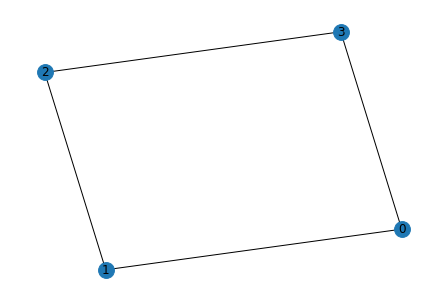

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
nx.draw(G, with_labels=True, alpha=1, node_size=250)

# Maxcut 2 Loops

### **Part A: Without Transpilation**

0. Create QAOA Circuit
1. Initialize Betta and Gamma parameters.
2. Save OpenQASM3 file
3. Execute Circuit on fake backend to get measurement results. 
4. Compute expectation value using the measurement results.
5. Use Classical Optimizer to find new set of parameters using classical optimization algorithm
6. Create new circuit with new set of parameters and then make OpenQASM3 file.


These are the basic steps. The following code has been **slightly** modified from Qiskits website. In the code you will see multiple comments stating,
```python
#STEP
```
to indicate which part of the code corresponds to the steps listed above. 


**Note: For more information about the Qiskit code for the Maxcut problem, click [HERE](https://qiskit.org/textbook/ch-applications/qaoa.html).**




### What does our QAOA circuit for the maxcut problem look like? 
1. What are the parameters that we are updating? **Answer:** The parameters are Beta and Gamma

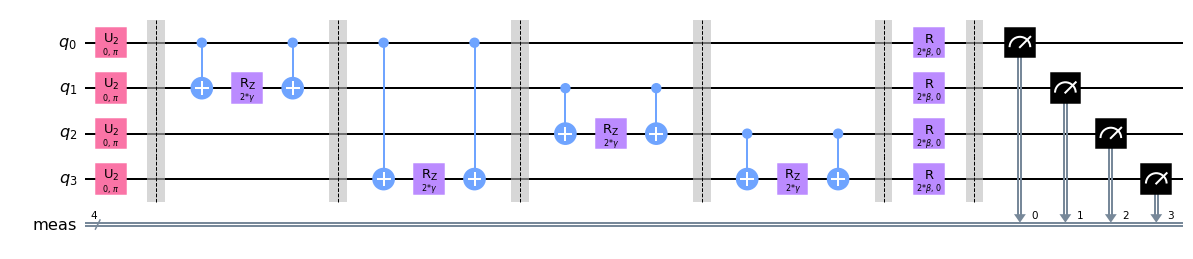

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

def create_qaoa_circ(G, theta):
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    qc.barrier()
    
    for irep in range(0, p):
        
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])
            qc.barrier()

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc


beta = Parameter("$\\beta$")
gamma = Parameter("$\\gamma$")

qc_paramNone_untranspiled = create_qaoa_circ(G, [beta, gamma])
qc_paramNone_untranspiled.decompose().draw("mpl")#.savefig("Images/MaxCut_paramNone_untranspiled_SC.jpg")

### Initializing the circuit with initial values of Beta and Gamma parameters

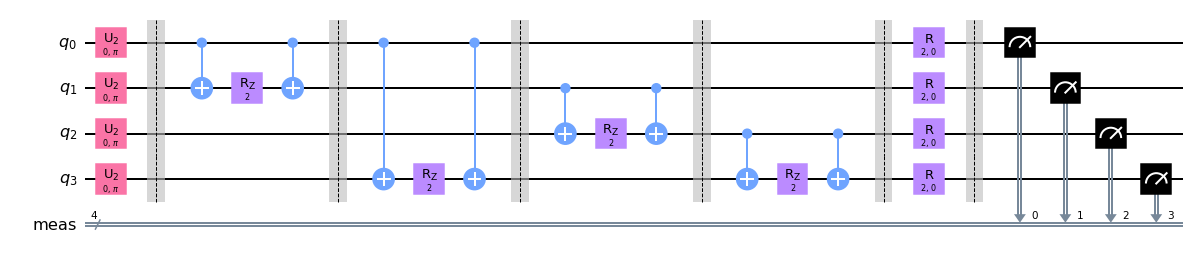

In [3]:
# STEP 0: Create QAOA Circuit 
# AND 
# STEP 1: Initialize Betta and Gamma parameters using theta.
beta = 1
gamma = 1
qc_param1_untranspiled = create_qaoa_circ(G, [beta, gamma])
qc_param1_untranspiled.decompose().draw("mpl")#.savefig("Images/MaxCut_param1_untranspiled_SC.jpg")

In [4]:
#STEP 2: Save OpenQASM3 file
from qiskit import qasm3
print(qasm3.dumps(qc_param1_untranspiled))
# Dump to file
#with open("Images/MaxCut_param1_untranspiled_SC.qasm", 'w+') as fp:
#    qasm3.dump(qc_param1_untranspiled, fp)

OPENQASM 3;
include "stdgates.inc";
gate rzz_140188025439664(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
gate rzz_140188025438992(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
gate rzz_140188025438560(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
gate rzz_140188025438464(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
bit[4] meas;
qubit[4] _all_qubits;
let q = _all_qubits[0:3];
h q[0];
h q[1];
h q[2];
h q[3];
barrier q[0], q[1], q[2], q[3];
rzz_140188025439664(2) q[0], q[1];
barrier q[0], q[1], q[2], q[3];
rzz_140188025438992(2) q[0], q[3];
barrier q[0], q[1], q[2], q[3];
rzz_140188025438560(2) q[1], q[2];
barrier q[0], q[1], q[2], q[3];
rzz_140188025438464(2) q[2], q[3];
barrier q[0], q[1], q[2], q[3];
rx(2) q[0];
rx(2) q[1];
rx(2) q[2];

### Defining several functions 
Up until now, only the untranspiled QAOA circuit has been defined. To make this an actual hybrid quantum-classical algorithm, these set of functions are needed to compute the expectation value. 

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count



# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G, p, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):        
        # STEP 0: Create QAOA Circuit 
        # AND 
        # STEP 1: Initialize Betta and Gamma parameters using theta.
        qc_param1_untranspiled = create_qaoa_circ(G, theta) 
        
        
        #(Optional): Can print/save circuit for each iteration. After each iteration the circuit will have updated betta and gamma parameters. 
        #qc_param1_untranspiled.decompose().draw(output='mpl').savefig("Images/MaxCut_param1_untranspiled_SC.jpg")

        
        #(Optional): Can print/save the OpenQASM3 file for each iteration.
        
        '''
        from qiskit import qasm3
        print(qasm3.dumps(qc_param1_untranspiled))
        # Dump to file
        #with open("Images/MaxCut_param1_untranspiled_SC.qasm", 'w+') as fp:
        #    qasm3.dump(qc_param1_untranspiled, fp)
        '''
        
        #STEP 3: Execute Circuit on fake backend to get measurement results. 
        counts = backend.run(qc_param1_untranspiled, seed_simulator=10, 
                             nshots=512).result().get_counts()
        
        
        # STEP 4: Compute expectation value using the measurement results.
        return compute_expectation(counts, G)
    
    return execute_circ

### Using a Classical Optimizer
The goal of the classical optimizer is to minimize the expectation value as much as possible. In this case, we are only iterating twice, therefore, the expectation value has not been fully minimized. That is okay though! Here, we care more about how the parameters, Beta, and Gamma have changed. Lets see how these parameters have changed after two iterations. 

**Note: For more information about the classical optimizer, click [HERE](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).**

In [6]:
from scipy.optimize import minimize


expectation = get_expectation(G, p=1)

# STEP 5: Use Classical Optimizer to find new set of parameters using classical optimization algorithm
res = minimize(expectation, 
                      [1.0, 1.0], #STEP 1: Initialize Betta and Gamma parameters.
                      method='COBYLA',
                      options={"maxiter":2})

new_parameters = res.x
print(res, "\n")
print("New Beta: ", res.x[0], "\nNew Gamma: ", res.x[1])

     fun: -2.7578125
   maxcv: 0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 2
  status: 2
 success: False
       x: array([2., 1.]) 

New Beta:  2.0 
New Gamma:  1.0


As you can see, the value of Beta has been updated from **1** to **2**. Gamma remains unchanged. Lets see what the untranspiled circuit looks like with this new Beta parameter.

### Reinitializing the circuit with the updated Beta and Gamma parameters

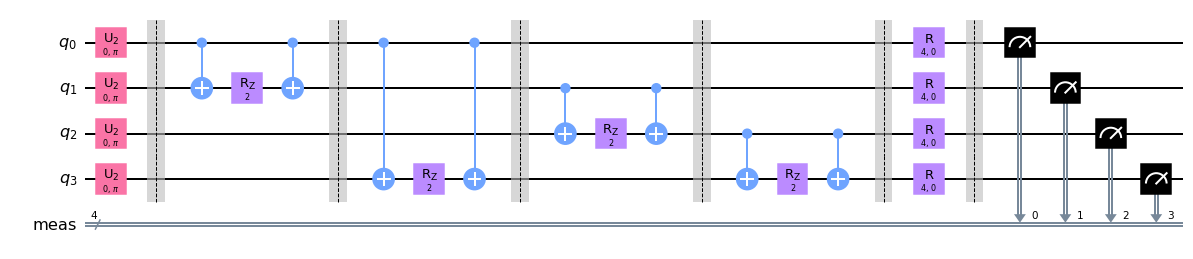

In [7]:
#STEP 6: Create new circuit with new set of parameters and then make OpenQASM3 file.
qc_param2_untranspiled = create_qaoa_circ(G, new_parameters)
qc_param2_untranspiled.decompose().draw(output='mpl')#.savefig("Images/MaxCut_param2_untranspiled_SC.jpg")

The circuit has remained the same, but the last set of four gates are rotated by **4** rather than **2**. This is because the Beta parameter has changed. We can also see these effects in the OpenQASM3 file.

In [8]:
from qiskit import qasm3
# Qiskit -> OpenQASM3
print(qasm3.dumps(qc_param2_untranspiled))

# Dump OpenQASM3 to file
#with open("Images/MaxCut_param2_untranspiled_SC.qasm", 'w+') as fp:
#    qasm3.dump(qc_param2_untranspiled, fp)

OPENQASM 3;
include "stdgates.inc";
gate rzz_140188035993504(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
gate rzz_140188035992640(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
gate rzz_140188035992688(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
gate rzz_140188035992736(_gate_p_0) _gate_q_0, _gate_q_1 {
  cx _gate_q_0, _gate_q_1;
  rz(2) _gate_q_1;
  cx _gate_q_0, _gate_q_1;
}
bit[4] meas;
qubit[4] _all_qubits;
let q = _all_qubits[0:3];
h q[0];
h q[1];
h q[2];
h q[3];
barrier q[0], q[1], q[2], q[3];
rzz_140188035993504(2) q[0], q[1];
barrier q[0], q[1], q[2], q[3];
rzz_140188035992640(2) q[0], q[3];
barrier q[0], q[1], q[2], q[3];
rzz_140188035992688(2) q[1], q[2];
barrier q[0], q[1], q[2], q[3];
rzz_140188035992736(2) q[2], q[3];
barrier q[0], q[1], q[2], q[3];
rx(4) q[0];
rx(4) q[1];
rx(4) q[2];

**The left is before. The right is after updating the parameters. The parametrized unitaries in the green box are dependent on the Beta parameter. As you can see it changed. Whereas the parametrized unitaries in the orange box are dependent on the Gamma parameter. The Gamma parameter did not change, therefore, the parametrized unitaries did not change.**
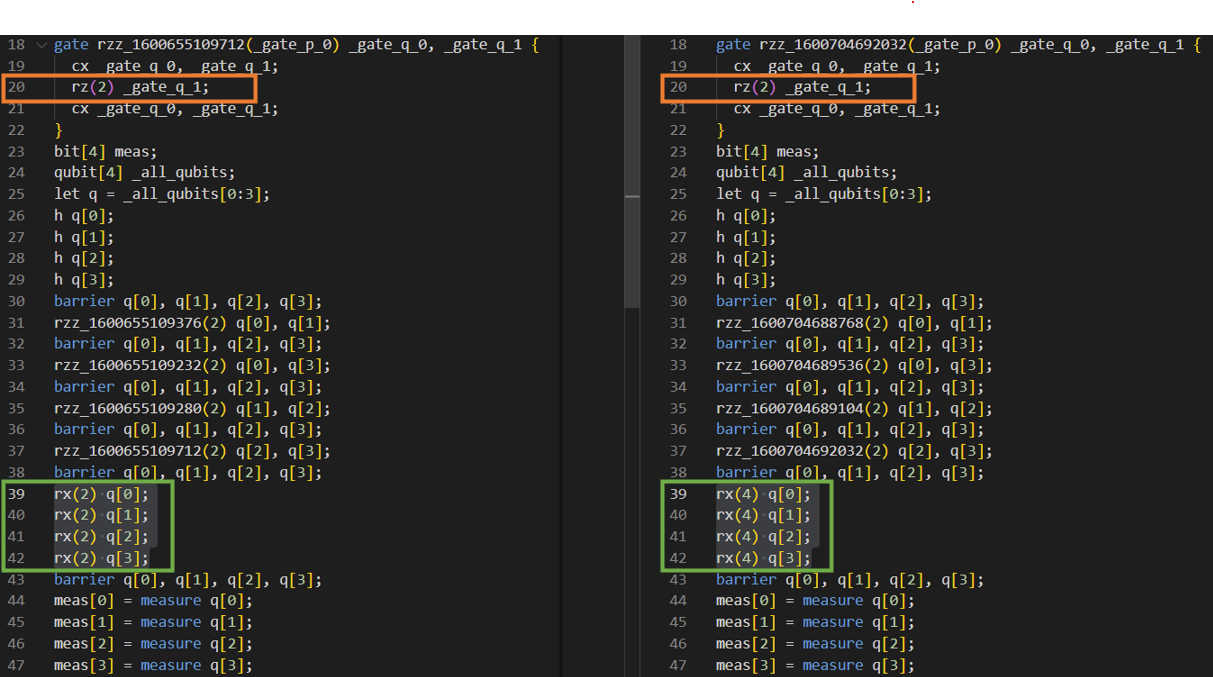


### **Part B: With Transpilation**

0. Create QAOA Circuit with specific backend.
1. Transpile with Qiskit
2. Initialize Betta and Gamma parameters.
3. Save OpenQASM3 file
4. Execute Circuit on fake backend to get measurement results. 
5. Compute expectation value using the measurement results.
6. Use Classical Optimizer to find new set of parameters using classical optimization algorithm
7. Create new OpenQASM3 file with new set of parameters.


These are the basic steps. The following code has been **slightly** modified from Qiskits website. In the code you will see multiple comments stating,
```python
#STEP
```
to indicate which part of the code corresponds to the steps listed above. 

**Note: For more information about the Qiskit code for the Maxcut problem, click [HERE](https://qiskit.org/textbook/ch-applications/qaoa.html).**


#### Substep 1) Choose a Backend

In [9]:
from qiskit import IBMQ
from qiskit.tools.jupyter import *
from qiskit.providers.fake_provider import FakeMelbourne#, FakeBoeblingen, FakeGuadalupe
from qiskit.transpiler import CouplingMap
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Define a simulated noisy backend
backend = FakeMelbourne()


# Print out basic features of this backend. 
print("---------------------------------Backend Configuration---------------------------------")

config = backend.configuration()
#pp.pprint(config.to_dict())

print("This backend is called {0}, and is on version {1}. \nIt has {2} qubit{3}. \nIt "
      "{4} OpenPulse programs. \nThe basis gates supported on this device are {5}. \nCoupling Map: {6}\n\n"
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map))


print("---------------------------------Backend Properties---------------------------------")
# Print out information about the Properties of the backend.
properties = backend.properties()
#pp.pprint(properties.to_dict())


---------------------------------Backend Configuration---------------------------------
This backend is called fake_melbourne, and is on version 0.0.0. 
It has 14 qubits. 
It does not support OpenPulse programs. 
The basis gates supported on this device are ['u1', 'u2', 'u3', 'cx', 'id']. 
Coupling Map: [[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]


---------------------------------Backend Properties---------------------------------


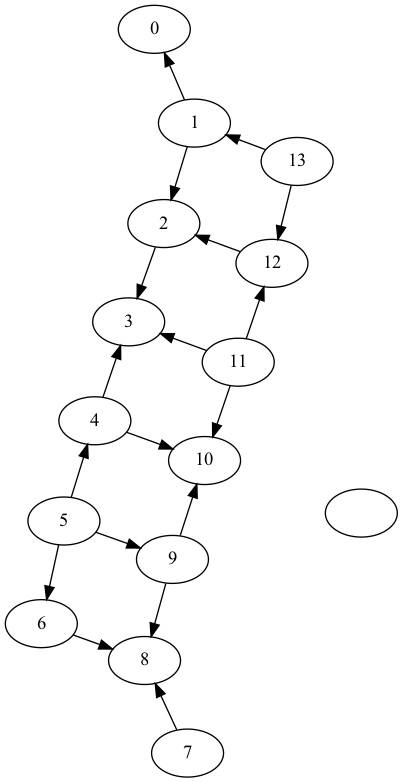

In [10]:
# Print Coupling Map
cm = CouplingMap(config.coupling_map)
cm.draw()

### Initializing the circuit with initial values of Beta and Gamma parameters

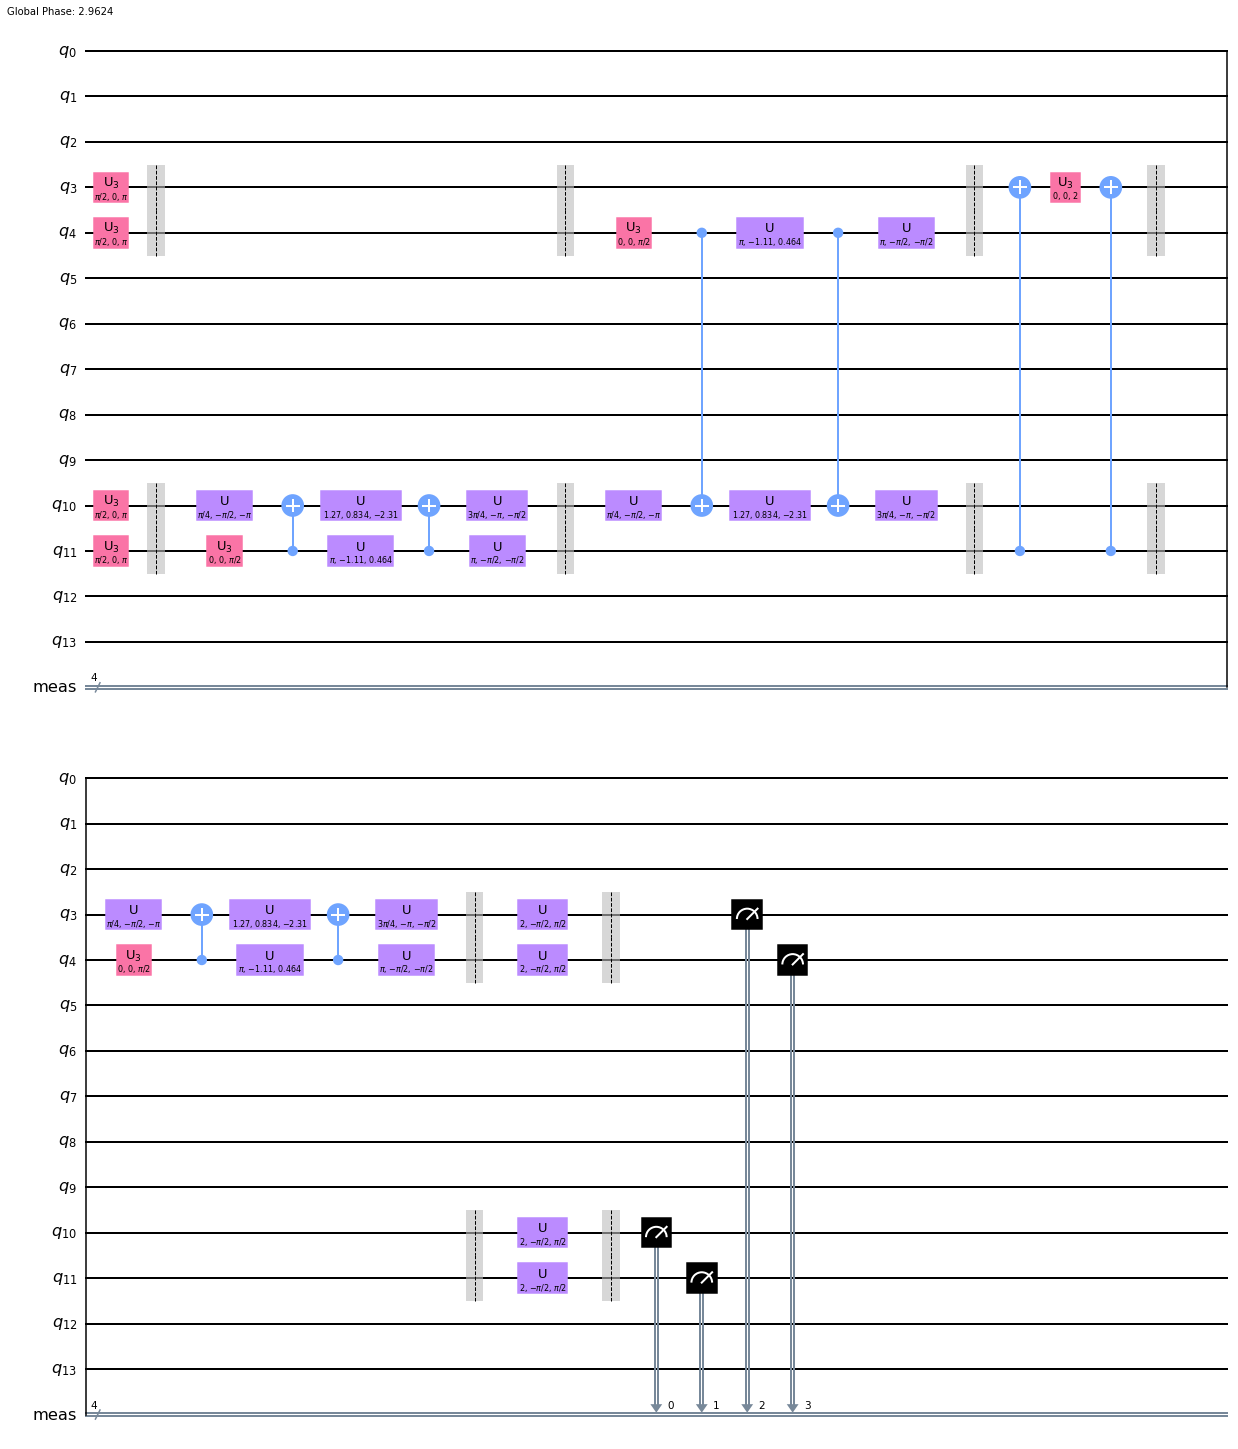

In [11]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit import transpile

# ALREADY DEFINED IN PREVIOUS CELL.
# def create_qaoa_circ(G, theta):


# STEP 0: Create QAOA Circuit 
# AND 
# STEP 1: Initialize Betta and Gamma parameters using theta.
beta = 1
gamma = 1
qc_param1_untranspiled = create_qaoa_circ(G, [beta, gamma])
qc_param1_transpiled3 = transpile(qc_param1_untranspiled, backend, optimization_level=3)
qc_param1_transpiled3.decompose().draw("mpl")#.savefig("Images/MaxCut_param1_transpiled3_SC.jpg")

In [12]:
# STEP 2: Save OpenQASM3 file
from qiskit import qasm3
print(qasm3.dumps(qc_param1_transpiled3))
# Dump to file
#with open("Images/MaxCut_param1_transpiled3_SC.qasm", 'w+') as fp:
#    qasm3.dump(qc_param1_transpiled3, fp)

OPENQASM 3;
include "stdgates.inc";
bit[4] meas;
u2(0, pi) $3;
u2(0, pi) $4;
u2(0, pi) $10;
u2(0, pi) $11;
barrier $10, $11, $3, $4;
u3(pi/4, -pi/2, -pi) $10;
u1(pi/2) $11;
cx $11, $10;
u3(1.2746, 0.83355, -2.308) $10;
u3(pi, -1.1071, 0.46365) $11;
cx $11, $10;
u3(3*pi/4, -pi, -pi/2) $10;
u3(pi, -pi/2, -pi/2) $11;
barrier $10, $11, $3, $4;
u3(pi/4, -pi/2, -pi) $10;
u1(pi/2) $4;
cx $4, $10;
u3(1.2746, 0.83355, -2.308) $10;
u3(pi, -1.1071, 0.46365) $4;
cx $4, $10;
u3(3*pi/4, -pi, -pi/2) $10;
u3(pi, -pi/2, -pi/2) $4;
barrier $10, $11, $3, $4;
cx $11, $3;
u1(2) $3;
cx $11, $3;
barrier $10, $11, $3, $4;
u3(pi/4, -pi/2, -pi) $3;
u1(pi/2) $4;
cx $4, $3;
u3(1.2746, 0.83355, -2.308) $3;
u3(pi, -1.1071, 0.46365) $4;
cx $4, $3;
u3(3*pi/4, -pi, -pi/2) $3;
u3(pi, -pi/2, -pi/2) $4;
barrier $10, $11, $3, $4;
u3(2, -pi/2, pi/2) $10;
u3(2, -pi/2, pi/2) $11;
u3(2, -pi/2, pi/2) $3;
u3(2, -pi/2, pi/2) $4;
barrier $10, $11, $3, $4;
meas[0] = measure $10;
meas[1] = measure $11;
meas[2] = measure $3;
meas[3]

### Defining several functions 

In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

# ALREADY DEFINED IN PREVIOUS CELL.
#def maxcut_obj(x, G):


# ALREADY DEFINED IN PREVIOUS CELL.
#def compute_expectation(counts, G):

# SLIGHTLY MODIFIED. Creates new circuit with updated parameters, THEN transpiles circuit with fake superconducting backend.
# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G, p, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = FakeMelbourne()
    backend.shots = shots
    
    def execute_circ(theta):        
        # STEP 0: Create QAOA Circuit 
        # AND 
        # STEP 1: Initialize Betta and Gamma parameters using theta.
        qc_param1_untranspiled = create_qaoa_circ(G, theta) 
        qc_param1_transpiled3 = transpile(qc_param1_untranspiled, backend, optimization_level=3)

        
        #(Optional): Can print/save circuit for each iteration. After each iteration the circuit will have updated betta and gamma parameters. 
        #qc_param1_transpiled3.decompose().draw(output='mpl').savefig("Images/MaxCut_param1_transpiled3_SC.jpg")

        
        #(Optional): Can print/save the OpenQASM3 file for each iteration.
        '''
        from qiskit import qasm3
        print(qasm3.dumps(qc_param1_transpiled3))
        # Dump to file
        #with open("Images/MaxCut_param1_transpiled3_SC.qasm", 'w+') as fp:
        #    qasm3.dump(qc_param1_transpiled3, fp)
        '''
        
        #STEP 3: Execute Circuit on fake backend to get measurement results. 
        counts = backend.run(qc_param1_transpiled3, seed_simulator=10, 
                             nshots=512).result().get_counts()
        
        
        # STEP 4: Compute expectation value using the measurement results.
        return compute_expectation(counts, G)
    
    return execute_circ

### Using a Classical Optimizer

In [ ]:
from scipy.optimize import minimize


expectation = get_expectation(G, p=1)

# STEP 5: Use Classical Optimizer to find new set of parameters using classical optimization algorithm
res = minimize(expectation, 
                      [1.0, 1.0], #STEP 1: Initialize Betta and Gamma parameters.
                      method='COBYLA',
                      options={"maxiter":2})

new_parameters = res.x
print(res, "\n")
print("New Beta: ", res.x[0], "\nNew Gamma: ", res.x[1])

### Reinitializing the circuit with the updated Beta and Gamma parameters

In [ ]:
#STEP 6: Create new circuit with new set of parameters and then make OpenQASM3 file.
qc_param2_untranspiled = create_qaoa_circ(G, new_parameters)
qc_param2_transpiled3 = transpile(qc_param2_untranspiled, backend, optimization_level=3)
qc_param2_transpiled3.decompose().draw(output='mpl')#.savefig("Images/MaxCut_param2_transpiled3_SC.jpg")

In [ ]:
from qiskit import qasm3
# Qiskit -> OpenQASM3
print(qasm3.dumps(qc_param2_transpiled3))

# Dump OpenQASM3 to file
#with open("Images/MaxCut_param2_transpiled3_SC.qasm", 'w+') as fp:
#    qasm3.dump(qc_param2_transpiled3, fp)

The before and after circuits are dumped to OpenQASM3, and we note that the only difference lies in the values of the rotation gates. **The circuit structure itself has not changed.**

**The left is before. The right is after updating the parameters. The parametrized unitaries in the green box are dependent on the Beta parameter. As you can see it changed. Whereas the parametrized unitaries in the orange box are dependent on the Gamma parameter. The Gamma parameter did not change, therefore, the parametrized unitaries did not change.**

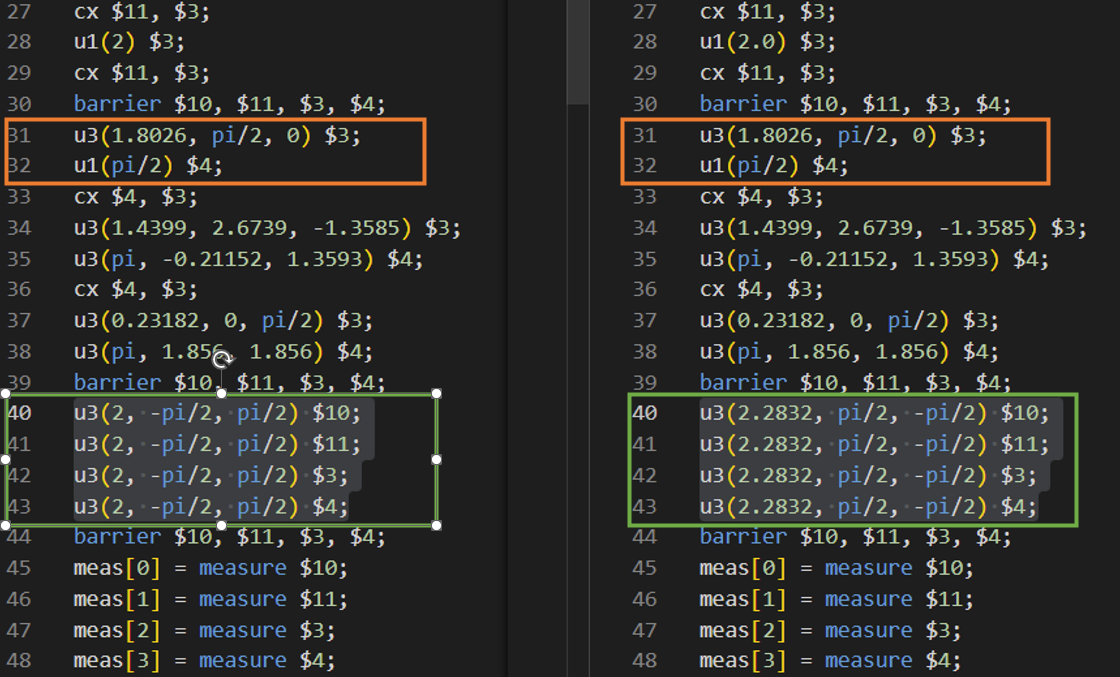

# STOP. Keeping this for reference. DO NOT use

### Step 0) Create QAOA circuit

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

def create_qaoa_circ(G, theta):
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    qc.barrier()
    
    for irep in range(0, p):
        
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])
            qc.barrier()

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc


beta = Parameter("$\\beta$")
gamma = Parameter("$\\gamma$")

qc_paramNone_untranspiled = create_qaoa_circ(G, [beta, gamma])
qc_paramNone_untranspiled.decompose().draw("mpl")#.savefig("Images/MaxCut_paramNone_untranspiled_SC.jpg")

In [ ]:
'''
# Qiskit Circuit  <-->  .qasm file
from qiskit import qasm3

# Qiskit -> OpenQASM3
# Print
print(qasm3.dumps(qc_paramNone_untranspiled))
# Dump to file
with open("Images/MaxCut_paramNone_untranspiled_SC.qasm", 'w+') as fp:
    qasm3.dump(qc_paramNone_untranspiled.decompose(), fp)
'''

### Step 1) Transpile with Qiskit
1. Choose A backend
2. Do optimization_level=3 transpilation with the backend.


#### Substep 1) Choose a Backend

In [ ]:
from qiskit import IBMQ
from qiskit.tools.jupyter import *
from qiskit.test.mock import FakeMelbourne#, FakeBoeblingen, FakeGuadalupe
from qiskit.transpiler import CouplingMap
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Define a simulated noisy backend
backend = FakeMelbourne()




# Print out basic features of this backend. 
print("---------------------------------Backend Configuration---------------------------------")

config = backend.configuration()
pp.pprint(config.to_dict())

print("This backend is called {0}, and is on version {1}. \nIt has {2} qubit{3}. \nIt "
      "{4} OpenPulse programs. \nThe basis gates supported on this device are {5}. \nCoupling Map: {6}\n\n"
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map))


print("---------------------------------Backend Properties---------------------------------")
# Print out information about the Properties of the backend.
properties = backend.properties()
pp.pprint(properties.to_dict())


In [ ]:
# Print Coupling Map
cm = CouplingMap(config.coupling_map)
cm.draw()

#### Substep 2) Do optimization_level=3 transpilation with the backend.

In [ ]:
from qiskit import transpile
    
qc_paramNone_transpiled3 = transpile(qc_paramNone_untranspiled, backend, optimization_level=3)
qc_paramNone_transpiled3.draw(output='mpl')#.savefig("Images/MaxCut_paramNone_transpiled3_SC.jpg")

### (Skip) Step 2) Initialize Beta and Gamma Parameters

In [ ]:
#qc_basis = create_qaoa_circ(G, [1.0, 1.0])
#qc_basis.decompose().draw("mpl")

### Step 3) Save OpenQASM3 file

In [ ]:
'''
# Qiskit Circuit  <-->  .qasm file
from qiskit import qasm3

# Qiskit -> OpenQASM3
# Print
print(qasm3.dumps(qc_paramNone_transpiled3))
# Dump to file
with open("Images/MaxCut_paramNone_transpiled3_SC.qasm", 'w+') as fp:
    qasm3.dump(qc_paramNone_transpiled3, fp)
'''

### Step 4)  Execute Circuit on fake backend to get measurement results. 


In [ ]:
# A function that executes the circuit on the chosen backend
def get_expectation(G, p, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = FakeMelbourne()
    backend.shots = shots
    
    def execute_circ(theta):
        
        #qc = create_qaoa_circ(G, theta)
        
        
        qc_param1_untranspiled = create_qaoa_circ(G, theta)
        #qc_param1_untranspiled.decompose().draw(output='mpl').savefig("Images/MaxCut_param1_untranspiled_SC.jpg")

        qc_param1_transpiled3 = transpile(qc_param1_untranspiled, backend, optimization_level=3)
        qc_param1_transpiled3.draw(output='mpl').savefig("Images/MaxCut_param1_transpiled3_SC.jpg")
        
        
        from qiskit import qasm3
        print(qasm3.dumps(qc_param1_transpiled3))
        # Dump to file
        with open("Images/MaxCut_param1_transpiled3_SC.qasm", 'w+') as fp:
            qasm3.dump(qc_param1_transpiled3, fp)
        
        
        counts = backend.run(qc_param1_transpiled3, seed_simulator=10, 
                             nshots=512).result().get_counts()
        
        
        #counts = backend.run(qc, seed_simulator=10, 
        #                     nshots=512).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

### Step 5) Compute expectation value using the measurement results.


In [ ]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
            
    return obj

def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count

### Step 6) Use Classical Optimizer to find new set of parameters using classical optimization algorithm

**Note: For more information about the classical optimizer, click [HERE](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).**



In [ ]:
from scipy.optimize import minimize


expectation = get_expectation(G, p=1)

# method = 'COBYLA' is the classical optimizer method
res = minimize(expectation, 
                      [1.0, 2.0], 
                      method='COBYLA',
                      options={"maxiter":1})

new_parameters = res.x
print(res, "\n")
print("New Beta: ", res.x[0], "\nNew Gamma: ", res.x[1])

### Step 7) Create new OpenQASM3 file with new set of parameters.

In [ ]:
qc_param2_untranspiled = create_qaoa_circ(G, new_parameters)

qc_param2_transpiled3 = transpile(qc_param2_untranspiled, backend, optimization_level=3)
qc_param2_transpiled3.decompose().draw(output='mpl').savefig("Images/MaxCut_param2_transpiled3_SC.jpg")

#qc_param2_transpiled3.decompose().draw('mpl')

In [ ]:
# Qiskit Circuit  <-->  .qasm file
from qiskit import qasm3

# Qiskit -> OpenQASM3
# Print
print(qasm3.dumps(qc_param2_transpiled3))
# Dump to file
with open("Images/MaxCut_param2_transpiled3_SC.qasm", 'w+') as fp:
    qasm3.dump(qc_param2_transpiled3, fp)